In [23]:
import json
import PathFinder_v2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [24]:
file = open("DataGraphs/NodesGraph.json")
NodesGraph = json.load(file)

file = open("DataGraphs/RunsLiftsGraph.json")
RunsLiftsGraph = json.load(file)

In [3]:
['f4946711-6818-4375-96ef-e487b025c61c', 'c9f9c391-af4f-46ba-9038-049249b02300', '3cc7911c-602b-48ac-8885-ffa5191a2fdb', '09f25c82-fbed-4e2d-b03e-7d187333708e', '56919131-300e-468e-a394-96c2e77a15a1', '2d650356-1491-4071-b456-f208db363bfb']

['f4946711-6818-4375-96ef-e487b025c61c',
 'c9f9c391-af4f-46ba-9038-049249b02300',
 '3cc7911c-602b-48ac-8885-ffa5191a2fdb',
 '09f25c82-fbed-4e2d-b03e-7d187333708e',
 '56919131-300e-468e-a394-96c2e77a15a1',
 '2d650356-1491-4071-b456-f208db363bfb']

In [34]:
#startingPointNode = 'K'
#startingPointNode = 'f4946711-6818-4375-96ef-e487b025c61c' # lac blanc lift
startingPointNode = '73b74019-2a85-4590-bbdd-6dd6554841b3' # funitel pecelt start

#runsInput = ['Beranger','Christine','Croissant']
#runsInput = ['0602c22d0ee93ab4320c45ce4d9d3cea5b49f867', 'f9214995594b42205bf550a2ea2433ae66a4dbd0', 'a0bb99c174db2bf009db1d1dbf8b918fe0a16b4a']
#runsInput = ['a0bb99c174db2bf009db1d1dbf8b918fe0a16b4a'] # croissant
#runsInput = ['c7ca163eb881f3d186a5467f6f5be8a102a4f1d5'] # beranger
#runsInput = ['327610f1acb523e9c5c26e69b849fb180f9939b7', '0602c22d0ee93ab4320c45ce4d9d3cea5b49f867'] # lac blanc and beranger#
#runsInput = ['327610f1acb523e9c5c26e69b849fb180f9939b7', '0602c22d0ee93ab4320c45ce4d9d3cea5b49f867', 'a0bb99c174db2bf009db1d1dbf8b918fe0a16b4a'] # lac blanc, beranger, and croissant
runsInput = ['327610f1acb523e9c5c26e69b849fb180f9939b7', 'f9214995594b42205bf550a2ea2433ae66a4dbd0', 'a0bb99c174db2bf009db1d1dbf8b918fe0a16b4a', '6acb68b760f81ca552ed986da7908b70d14fc098','45080627d3faec5a150fbccff7fcd193a28e1942'] # lac blanc, Christine, and croissant
weights = {
        "lift": 1.4,
        "novice": 1,
        "easy": 1.2,
        "intermediate": 1.4,
        "advanced": 1.6
    }

defaultRuns = {
    'Beranger': {'nodes': ['A', 'F', 'D', 'G', 'I', 'R'], 'totalRunLength': 24},
    'Lac Blanc': {'nodes': ['A', 'B', 'C', 'D'], 'totalRunLength': 13},
    'Tete Ronde': {'nodes': ['A', 'E', 'W', 'S'], 'totalRunLength': 24},
    'Vires': {'nodes': ['B', 'L'], 'totalRunLength': 7},
    'Croissant': {'nodes': ['L', 'M', 'N'], 'totalRunLength': 13},
    'Corniche': {'nodes': ['N', 'J'], 'totalRunLength': 5},
    'Boulevard Lauzes': {'nodes': ['D', 'H'], 'totalRunLength': 7},
    'Trolles': {'nodes': ['P', 'G'], 'totalRunLength': 2},
    'Ardoises': {'nodes': ['G', 'H'], 'totalRunLength': 3},
    'Adrien Theaux': {'nodes': ['O', 'P', 'Q'], 'totalRunLength': 3},
    'BlackOQ': {'nodes': ['O', 'Q'], 'totalRunLength': 9},
    'Roc': {'nodes': ['R', 'J', 'K'], 'totalRunLength': 4},
    'Dalles': {'nodes': ['H', 'S', 'T', 'U', 'V'], 'totalRunLength': 11},
    'Christine': {'nodes': ['W', 'X'], 'totalRunLength': 17},
    '2 Combes': {'nodes': ['S', 'X'], 'totalRunLength': 6},
    'Combes de Thorens': {'nodes': ['X', 'Y', 'Z', 'V', 'K'], 'totalRunLength': 12},
    'RedLC': {'nodes': ['L', 'C'], 'totalRunLength': 2},
    'RedEF': {'nodes': ['E', 'F'], 'totalRunLength': 6},
    'BlueTR': {'nodes': ['T', 'R'], 'totalRunLength': 4},
    'GreenUJ': {'nodes': ['U', 'J'], 'totalRunLength': 4}
}

In [22]:
# with self made test cases

def GetSelectedSkiRuns(runsInput, defaultRuns):  #Loops through list of selected runs and takes their information from the dictionary
    selectedDefaultSkiRuns = []
    for runName in runsInput:
        #print(runName)
        if runName in defaultRuns:
            selectedDefaultSkiRuns.append({runName: defaultRuns[runName]})
            print({runName: defaultRuns[runName]})

    return selectedDefaultSkiRuns


def GetStartEndPairs(selectedDefaultSkiRuns):
    startEndPairsList = []
    for run in selectedDefaultSkiRuns:  #loop each run inside the selected runs list
        runName = next(iter(run))   #Takes the first key in the dictionary and asigns it to key 'runName' ('Croissant')
        runDict = run[runName]      #Uses the run name to extract the internal dictionary for that run (nodes and length)

        nodesList = list(runDict['nodes'])    #Get nodes from each inner dictionary in each run list entry

        startNode = nodesList[0]
        endNode = nodesList[-1]
        startEndPairs = [startNode, endNode]

        #print(startEndPairs)
        startEndPairsList.append(startEndPairs)
        
    return startEndPairsList

def AppendStartNodeToPermutations(permutations, startingNode):
    AppendedPermutationsList = []
    for permutation in permutations:
        sumPerms = sum(permutation, [])
        sumPerms.insert(0,startingNode)
        AppendedPermutationsList.append(sumPerms)

    return AppendedPermutationsList

selectedDefaultSkiRuns = GetSelectedSkiRuns(runsInput, defaultRuns)
    #print("selected ski runs: ", selectedDefaultSkiRuns)

selectedDefaultSkiRunsStartEndPairs = GetStartEndPairs(selectedDefaultSkiRuns)
    #print("Selected ski run pairs:",selectedDefaultSkiRunsStartEndPairs)

selectedDefaultSkiRunsPermutations = PathFinder_v2.GetAllPermutations(selectedDefaultSkiRunsStartEndPairs)
    #print(selectedDefaultSkiRunsPermutations)

appendedStartNodeToEachPermutation = AppendStartNodeToPermutations(selectedDefaultSkiRunsPermutations, startingPointNode)
appendedStartNodeToEachPermutation

[['c34be593-a9bc-46b0-9b62-ee9e71af9243']]

In [20]:
def GetStartEndPairs(runsInput, RunsLiftsGraph):
    startEndPairsList = []
    for runID in runsInput:
        if runID in RunsLiftsGraph:
            startNode = RunsLiftsGraph.get(runID).get("point_ids")[0]
            endNode = RunsLiftsGraph.get(runID).get("point_ids")[-1]
            startEndPairs = [startNode, endNode]
            startEndPairsList.append(startEndPairs)

    return startEndPairsList


def AppendStartNodeToPermutations(permutations, startingNode):
    AppendedPermutationsList = []
    for permutation in permutations:
        sumPerms = sum(permutation, [])
        sumPerms.insert(0,startingNode)
        AppendedPermutationsList.append(sumPerms)

    return AppendedPermutationsList

In [35]:
selectedDefaultSkiRunsStartEndPairs = GetStartEndPairs(runsInput, RunsLiftsGraph)

selectedDefaultSkiRunsPermutations = PathFinder_v2.GetAllPermutations(selectedDefaultSkiRunsStartEndPairs)

appendedStartNodeToEachPermutation = AppendStartNodeToPermutations(selectedDefaultSkiRunsPermutations, startingPointNode)
appendedStartNodeToEachPermutation

[['73b74019-2a85-4590-bbdd-6dd6554841b3',
  'e8da35c2-8d3a-4f8a-b4b3-5b5b9e35d493',
  '190a5081-732a-40a3-bc1d-6035b336386b',
  '9edf8769-1d22-4e60-8199-fccddf6ba3ef',
  'adc9bbb1-68cf-4510-85d2-1c6b1e022e9c',
  '4e7d3e6b-0ad1-4d39-8087-e0cf861cff2d',
  '8c923bf7-e6b1-44aa-ad80-a64c60914865',
  'd3dbb8c3-6c9f-4889-8a68-9950380c6015',
  '70003f14-73a9-4a2e-8aa4-7d04cbc44399',
  '51e76548-981e-4b07-972e-74daa47891a0',
  'fb22be8b-2eb9-4692-a05f-0e0b9afe7d2b'],
 ['73b74019-2a85-4590-bbdd-6dd6554841b3',
  'e8da35c2-8d3a-4f8a-b4b3-5b5b9e35d493',
  '190a5081-732a-40a3-bc1d-6035b336386b',
  '9edf8769-1d22-4e60-8199-fccddf6ba3ef',
  'adc9bbb1-68cf-4510-85d2-1c6b1e022e9c',
  '4e7d3e6b-0ad1-4d39-8087-e0cf861cff2d',
  '8c923bf7-e6b1-44aa-ad80-a64c60914865',
  '51e76548-981e-4b07-972e-74daa47891a0',
  'fb22be8b-2eb9-4692-a05f-0e0b9afe7d2b',
  'd3dbb8c3-6c9f-4889-8a68-9950380c6015',
  '70003f14-73a9-4a2e-8aa4-7d04cbc44399'],
 ['73b74019-2a85-4590-bbdd-6dd6554841b3',
  'e8da35c2-8d3a-4f8a-b4b3-5b5b9

In [36]:
EndToStartPairs = []
shortestPathList = []
shortestDisPathForEachPermDict = {}
shortestPathListForEachPermList = []

if __name__ == "__main__":

    for perm in appendedStartNodeToEachPermutation:
        totalDistance = 0
        totalPath = []
                                                #starting value of seq   |   length of list   |   increment
        for i in range(0, len(perm), 2):        #range(0,                |        len(perm)   |     , 2)
                
                
                
            if i + 1 < len(perm):
                pair = (perm[i], perm[i + 1])
                EndToStartPairs.append(pair)

                print("-----------------------Pair: ", pair)
                    
                #Do Astar from here
                shortestPathForCurrentPermutation = PathFinder_v2.AStar(NodesGraph, perm[i], perm[i + 1], weights)
                #print("Shorted path for current permutation:" , shortestPathForCurrentPermutation)

                if shortestPathForCurrentPermutation is not None:
                    distance = PathFinder_v2.CalculateTotalDistance(shortestPathForCurrentPermutation, NodesGraph, weights) #Calculates path distance for current pair in permutation

                    shortestDistancePathForCurrentPermutationDict = {'distance': distance, 'path': shortestPathForCurrentPermutation}
                    shortestPathList.append(shortestDistancePathForCurrentPermutationDict)


                    totalPath.append(shortestPathForCurrentPermutation)    #Total current path to each pair in the permutation  
                    totalDistance += distance
                        
                    
                else:
                    print("There is no path")

                shortestDisPathForEachPermDict = {'distance': totalDistance, 'path': totalPath}

            else:
                #Add the last node after the Astar result TODO
                EndToStartPairs.append(perm[i]) #only adds one node (maybe insert this as a seperate var?)  

            
        print("Total Distance: ", totalDistance, "| Total Path: ", totalPath)
        shortestPathListForEachPermList.append(shortestDisPathForEachPermDict)
        
        for key, value in shortestDisPathForEachPermDict.items():
            print(key, ":", value)


minDistance = float('inf')
minPath = None

# Iterate through each dictionary in the list
for shortestDisPathForEachPermDict in shortestPathListForEachPermList:

    distance = shortestDisPathForEachPermDict['distance']
    path = shortestDisPathForEachPermDict['path']

    # Compare distance with the current minimum distance
    if distance < minDistance:
        minDistance = distance 
        minPath = path
print("--------------------------------------------------------------------")
print("Smallest distance:", minDistance)
print("Corresponding path:", minPath)
print("--------------------------------------------------------------------")

-----------------------Pair:  ('73b74019-2a85-4590-bbdd-6dd6554841b3', 'e8da35c2-8d3a-4f8a-b4b3-5b5b9e35d493')
-----------------------Pair:  ('190a5081-732a-40a3-bc1d-6035b336386b', '9edf8769-1d22-4e60-8199-fccddf6ba3ef')
-----------------------Pair:  ('adc9bbb1-68cf-4510-85d2-1c6b1e022e9c', '4e7d3e6b-0ad1-4d39-8087-e0cf861cff2d')
-----------------------Pair:  ('8c923bf7-e6b1-44aa-ad80-a64c60914865', 'd3dbb8c3-6c9f-4889-8a68-9950380c6015')
-----------------------Pair:  ('70003f14-73a9-4a2e-8aa4-7d04cbc44399', '51e76548-981e-4b07-972e-74daa47891a0')
Total Distance:  1944.4926539841188 | Total Path:  [['73b74019-2a85-4590-bbdd-6dd6554841b3', '75066a25-8514-4eec-8824-74db970d5024', '419bf5b5-0497-4bb0-823c-ac7107d872f2', '2bc2fd7d-9dc5-4155-97e4-7b6d84f3d67d', '88f507d3-720f-4e22-af54-52b2902537c7', '93c6c039-1cbc-4263-9712-18b723a89914', 'e8da35c2-8d3a-4f8a-b4b3-5b5b9e35d493'], ['190a5081-732a-40a3-bc1d-6035b336386b', '93c6c039-1cbc-4263-9712-18b723a89914', 'e8da35c2-8d3a-4f8a-b4b3-5b5b9

Plot suggested nodes

In [16]:
file = open("LocationGraph.json")
LocationGraph = json.load(file)

runsliftmap = pd.read_pickle("/Users/sebastian/Documents/SkiNavApp/runsliftmap.pkl")

In [17]:
def plot_visited_nodes(runsliftmap, runsInput, minPath, idx_nodes_start=None, idx_nodes_end=None):
    """
    runsliftmap: dataframe with all the runs as linestrings
    runsInput: selected runs
    minPath: shortes path found by Astar
    idx_nodes_start: the index of the first node that should be annotate on the map
    idx_nodes_end: the index of the last node that should be annotate on the map
    """
    if idx_nodes_start is None:
        idx_nodes_start = 0 
    if idx_nodes_end is None:
        idx_nodes_end = len(sum(minPath, []))

    visited_nodes = []
    for node in sum(minPath, []):
        visited_nodes.append(tuple(LocationGraph.get(node)))
    visited_nodes = np.asarray(visited_nodes)
    nodes_data = gpd.GeoDataFrame(visited_nodes, geometry=gpd.points_from_xy(visited_nodes[:,0], visited_nodes[:,1])).reset_index()
    
    fig, ax = plt.subplots(figsize=(12,14))
    runsliftmap.plot(ax=ax)
    runsliftmap[runsliftmap.id.isin(runsInput)].plot(ax=ax, color="lightgreen")
    nodes_data.geometry.plot(ax=ax, color="red")
    nodes_data.iloc[idx_nodes_start:idx_nodes_end].apply(lambda x: ax.annotate(text=x['index'], xy=x.geometry.centroid.coords[0], ha='right', size=8), axis=1)
    plt.show()

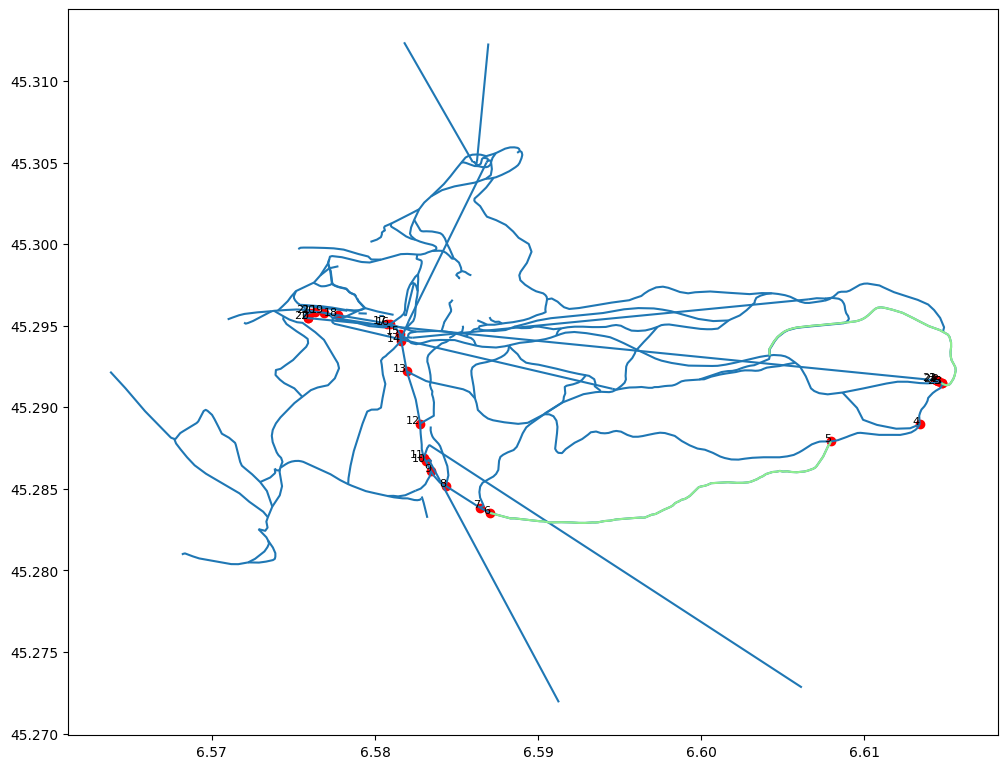

In [18]:
plot_visited_nodes(runsliftmap, runsInput, minPath)

In [15]:
# funitel pecelt lift, lac blanc and beranger runs
['2bda5768-f82a-404f-a1e1-2ccde0832c9a', '0fab967d-21ea-4ba5-ad5e-4987d82fd6cc', 'cadb5cc0-e9d6-491d-8803-576c632e8427', 'e7ff881b-a6da-4956-93aa-c6d3cdc044b7', '6398f2e1-580b-42db-b5be-e6e13c36123b', '8f1be7bb-707c-4d2f-8fb1-dcb0748e7bfe', '4e690d61-4d39-4d9c-90d4-89c98a73910e', 'f9c5582d-6b1a-4e06-bb5e-3f46a7a3dea6', '192ec09c-3272-4ce9-86af-33f621e4a54f', '4488e85d-5b85-4291-ab5a-ed109b3e1b8e', 'bae2ef9b-a781-48b0-a0e3-46c2819bc261', 'e31933a8-07be-4d0d-8cee-318037531801', 'c0b83072-b9cd-4489-bad1-5a7530a0e096', '6cf6076b-9f36-4866-8798-cf9dbd8b78f4', '1a3bd67c-76b1-4edd-a7d2-ae568145fcbf', '5cb0b3f0-371e-44ef-8707-f5f83f0bfeb3', 'cd751fe7-e86f-42db-a2d4-29910544cbbc', 'e45cf88b-dcd8-4179-a214-842de8c674e6', '2bda5768-f82a-404f-a1e1-2ccde0832c9a', '0fab967d-21ea-4ba5-ad5e-4987d82fd6cc', 'cadb5cc0-e9d6-491d-8803-576c632e8427', 'e7ff881b-a6da-4956-93aa-c6d3cdc044b7']

['2bda5768-f82a-404f-a1e1-2ccde0832c9a',
 '0fab967d-21ea-4ba5-ad5e-4987d82fd6cc',
 'cadb5cc0-e9d6-491d-8803-576c632e8427',
 'e7ff881b-a6da-4956-93aa-c6d3cdc044b7',
 '6398f2e1-580b-42db-b5be-e6e13c36123b',
 '8f1be7bb-707c-4d2f-8fb1-dcb0748e7bfe',
 '4e690d61-4d39-4d9c-90d4-89c98a73910e',
 'f9c5582d-6b1a-4e06-bb5e-3f46a7a3dea6',
 '192ec09c-3272-4ce9-86af-33f621e4a54f',
 '4488e85d-5b85-4291-ab5a-ed109b3e1b8e',
 'bae2ef9b-a781-48b0-a0e3-46c2819bc261',
 'e31933a8-07be-4d0d-8cee-318037531801',
 'c0b83072-b9cd-4489-bad1-5a7530a0e096',
 '6cf6076b-9f36-4866-8798-cf9dbd8b78f4',
 '1a3bd67c-76b1-4edd-a7d2-ae568145fcbf',
 '5cb0b3f0-371e-44ef-8707-f5f83f0bfeb3',
 'cd751fe7-e86f-42db-a2d4-29910544cbbc',
 'e45cf88b-dcd8-4179-a214-842de8c674e6',
 '2bda5768-f82a-404f-a1e1-2ccde0832c9a',
 '0fab967d-21ea-4ba5-ad5e-4987d82fd6cc',
 'cadb5cc0-e9d6-491d-8803-576c632e8427',
 'e7ff881b-a6da-4956-93aa-c6d3cdc044b7']

In [38]:
# funitel peclet lift and trolles run 
['2bda5768-f82a-404f-a1e1-2ccde0832c9a', '0fab967d-21ea-4ba5-ad5e-4987d82fd6cc', 'cadb5cc0-e9d6-491d-8803-576c632e8427', '210ad409-c8a3-48a6-ba61-8987cbc20538', 'b346e7a2-3a3c-4114-b43e-63820e80097d', '09f25c82-fbed-4e2d-b03e-7d187333708e', '56919131-300e-468e-a394-96c2e77a15a1', 'e665438f-226d-41b2-b94b-124a2e3e6462', 'c13ae4fc-b5f9-4b17-aa96-fe67a061c195', '4e690d61-4d39-4d9c-90d4-89c98a73910e']

['2bda5768-f82a-404f-a1e1-2ccde0832c9a',
 '0fab967d-21ea-4ba5-ad5e-4987d82fd6cc',
 'cadb5cc0-e9d6-491d-8803-576c632e8427',
 '210ad409-c8a3-48a6-ba61-8987cbc20538',
 'b346e7a2-3a3c-4114-b43e-63820e80097d',
 '09f25c82-fbed-4e2d-b03e-7d187333708e',
 '56919131-300e-468e-a394-96c2e77a15a1',
 'e665438f-226d-41b2-b94b-124a2e3e6462',
 'c13ae4fc-b5f9-4b17-aa96-fe67a061c195',
 '4e690d61-4d39-4d9c-90d4-89c98a73910e']

In [39]:
# lac blanc lift and croissant run
['f4946711-6818-4375-96ef-e487b025c61c', 'c9f9c391-af4f-46ba-9038-049249b02300', '3cc7911c-602b-48ac-8885-ffa5191a2fdb', '09f25c82-fbed-4e2d-b03e-7d187333708e', '56919131-300e-468e-a394-96c2e77a15a1', '2d650356-1491-4071-b456-f208db363bfb']

['f4946711-6818-4375-96ef-e487b025c61c',
 'c9f9c391-af4f-46ba-9038-049249b02300',
 '3cc7911c-602b-48ac-8885-ffa5191a2fdb',
 '09f25c82-fbed-4e2d-b03e-7d187333708e',
 '56919131-300e-468e-a394-96c2e77a15a1',
 '2d650356-1491-4071-b456-f208db363bfb']